In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
corona_df = pd.read_csv("../data/2019_nCoV_data.csv")

In [3]:
corona_df.shape

(770, 8)

In [4]:
'''
Remove Sno i.e. id column and drop na columns
'''
corona_df = corona_df.dropna()
corona_df = corona_df.drop(['Sno'], axis=1)

In [5]:
corona_df.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [6]:
corona_df.describe()

,Confirmed,Deaths,Recovered
count,585.000000,585.000000,585.000000
mean,209.311111,4.516239,5.511111
std,1160.976186,36.140946,32.850746
min,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,18.000000,0.000000,0.000000
75%,95.000000,0.000000,2.000000
max,16678.000000,479.000000,522.000000


In [7]:
corona_df["Location"] = corona_df["Province/State"] + ", " + corona_df["Country"]

In [8]:
corona_df = corona_df.drop(['Province/State'], axis = 1)

In [10]:
from opencage.geocoder import OpenCageGeocode

In [11]:
f = open("../apikey.txt", "r")
key = f.read()
key = key.replace("\n", "")

In [12]:
geocoder = OpenCageGeocode(key)

In [13]:
cached_results = {}

In [14]:
def get_latitude(x):
    if cached_results.get(x):
        results = cached_results[x]
    else:
        results = geocoder.geocode(x)
        cached_results[x] = results
    
    lat = results[0]['geometry']['lat']
    return lat
    
def get_longitude(x):
    if cached_results.get(x):
        results = cached_results[x]
    else:
        results = geocoder.geocode(x)
        cached_results[x] = results
    lng = results[0]['geometry']['lng']
    return lng

In [15]:
corona_df['Latitude'] = corona_df['Location'].apply(get_latitude)

In [16]:
corona_df['Longitude'] = corona_df['Location'].apply(get_longitude)

In [17]:
corona_df.head()

,Date,Country,Last Update,Confirmed,Deaths,Recovered,Location,Latitude,Longitude
0,01/22/2020 12:00:00,China,01/22/2020 12:00:00,1.0,0.0,0.0,"Anhui, China",32.000000,117.000000
1,01/22/2020 12:00:00,China,01/22/2020 12:00:00,14.0,0.0,0.0,"Beijing, China",39.906217,116.391276
2,01/22/2020 12:00:00,China,01/22/2020 12:00:00,6.0,0.0,0.0,"Chongqing, China",29.558571,106.549282
3,01/22/2020 12:00:00,China,01/22/2020 12:00:00,1.0,0.0,0.0,"Fujian, China",26.545000,117.842778
4,01/22/2020 12:00:00,China,01/22/2020 12:00:00,0.0,0.0,0.0,"Gansu, China",38.000000,102.000000


In [18]:
import matplotlib.pyplot as plt

In [19]:
corona_df.shape

(585, 9)

In [20]:
import geopandas
import geoplot

In [26]:
collisions

,id,NUMBER OF PERSONS INJURED,BOROUGH,geometry
0,11,1,BROOKLYN,POINT (-73.94268 40.67650)
1,21,1,MANHATTAN,POINT (-74.00834 40.72132)
2,27,1,BROOKLYN,POINT (-73.97076 40.68764)
3,28,1,BRONX,POINT (-73.83874 40.88127)
4,33,1,BROOKLYN,POINT (-73.98873 40.59300)
...,...,...,...,...
20639,920296,1,MANHATTAN,POINT (-73.98786 40.72270)
20640,920302,1,BROOKLYN,POINT (-73.99766 40.63837)
20641,920312,1,MANHATTAN,POINT (-73.95632 40.80312)
20642,920313,2,BROOKLYN,POINT (-73.96255 40.71253)


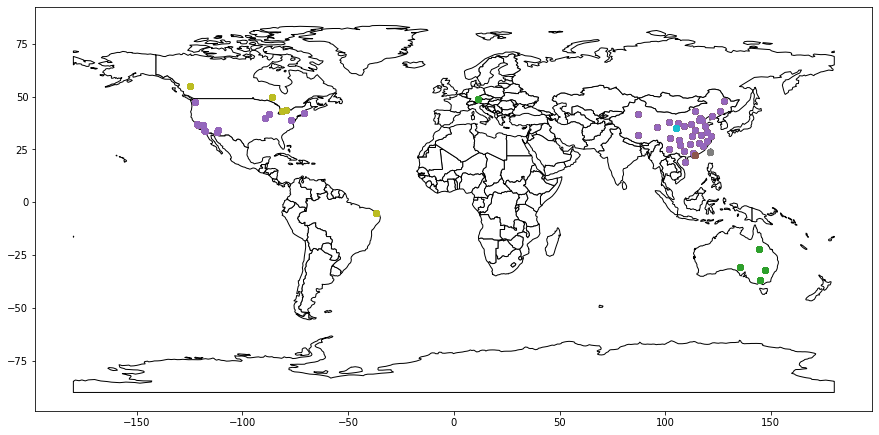

In [27]:
fig, ax = plt.subplots(figsize=(15,15))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='white', edgecolor='black')
for country in corona_df['Country'].values:
    ax.scatter(corona_df[corona_df['Country'] == country]['Longitude'],
                corona_df[corona_df['Country'] == country]['Latitude'], alpha=1, marker='o')